## Discretización usando agrupación K- medias


Este método de discretización consiste en aplicar la agrupación k-medias a la variable continua para estimar los limites de los intervalos que se van a usar para el proceso de discretización. 

El algoritmo funciona así:

- 1) Inicialización: creación aleatoria de los k centros 
- 2) Cada observación está asociada con el centro más cercano 
- 3) La posición de cada centro se recalcula como el centro de las observaciones asociadas

Los pasos 2 y 3 se repiten hasta que el algoritmo converge. El algoritmo minimiza la diferencia de la desviación de cada observación con el centro del mismo grupo.

Más detalles sobre k-medias [aquí](https://es.wikipedia.org/wiki/K-medias)

Un blog en inglés donde encontrarás explicación gráfica del k-medias [aquí](https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0) 

El usuario necesita definir el número de grupos, al igual que en la discretización en intervalos igual rango y frecuencia.

## Opinión de las instructoras

Personalmente no vemos cómo esta técnica es diferente de la discretización de segmentos de igual rango, cuando las variables son continuas en un rango de valores. Potencialmente haría diferencia si los valores estuviesen agrupados o aglomerados en centros reales.


Nuestra recomendación es, a no ser que tengas razones para creer que los valores de la variable están agrupados en centros,  que uses la discretización con intervalos de igual rango como una alternativa a este método.


## En este demo

Aprenderás cómo discretizar variables con el método k-medias usando los datos del Titanic y Scikit-learn

## Titanic dataset

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
# cargar variables numéricas Titanic Dataset

data = pd.read_csv('../titanic.csv',
                   usecols=['age', 'fare', 'survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [4]:
# separemos sets entrenamiento y prueba 

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

Las variables age y fare contienen datos faltantes. Los vamos a completar extrayendo una muestra aleatoria de la variable.

In [5]:
def impute_na(data, variable):
    
    # función para reemplazar NA con una muestra aleatoria

    df = data.copy()

    # muestra aleatoria
    df[variable+'_aleatoria'] = df[variable]

     # extraer muestra aleatoria para completar datos faltantes na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas necesita tener el mismo index para poder 
    # combinar los dataframes
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_aleatoria'] = random_sample

    return df[variable+'_aleatoria']

In [6]:
# reemplazar los NA en sets de entrenamiento y prueba

X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

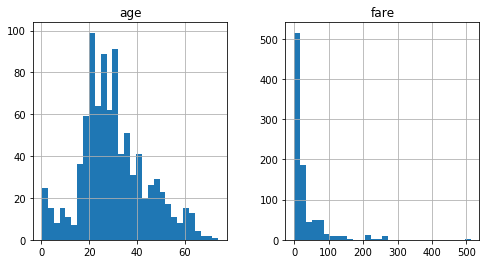

In [7]:
# exploremos la distribución de la variable age

X_train[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

## Discretización k-medias con Scikit-learn

In [8]:
disc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

disc.fit(X_train[['age', 'fare']])

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='kmeans')

In [9]:
disc.bin_edges_

array([array([ 0.1667    , 13.50716125, 26.24501412, 37.58671123, 51.55674859,
       74.        ]),
       array([  0.        ,  48.38317511, 155.62486898, 371.03119259,
       512.3292    ])], dtype=object)

In [10]:
train_t = disc.transform(X_train[['age', 'fare']])

train_t = pd.DataFrame(train_t, columns = ['age', 'fare'])

train_t.head()

,age,fare
0,0.0,0.0
1,0.0,0.0
2,2.0,0.0
3,1.0,0.0
4,1.0,0.0


In [11]:
test_t = disc.transform(X_test[['age', 'fare']])

test_t = pd.DataFrame(test_t, columns = ['age', 'fare'])

Text(0, 0.5, 'Porcentaje de observaciones por intervalo')

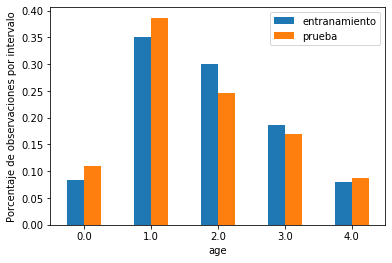

In [12]:
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['entranamiento', 'prueba']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Porcentaje de observaciones por intervalo')

Text(0, 0.5, 'Porcentaje de observaciones por intervalo')

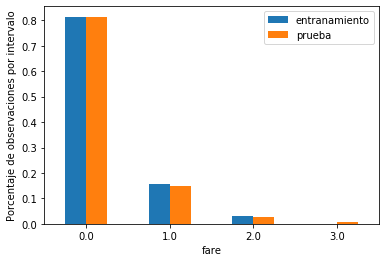

In [13]:
t1 = train_t.groupby(['fare'])['fare'].count() / len(train_t)
t2 = test_t.groupby(['fare'])['fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['entranamiento', 'prueba']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Porcentaje de observaciones por intervalo')